In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [23]:
#Loading the dataframe
comment_df=pd.read_csv('Tokenized_comment_df.csv')
top_uni=comment_df[comment_df['status']=='top']
bottom_uni=comment_df[comment_df['status']=='bottom'].reset_index(drop=True)

## Double bar plot

{'backtests': 13, 'declared': 5, 'inferential': 5, 'remarkably': 12, 'eloquent': 18, 'redemption': 4, 'recommed': 6, 'nobel': 20, 'recycled': 5, 'researeasch': 2} 

{'pertaining': 21, 'lawyer': 37, 'preaches': 29, 'hybrid': 133, 'snack': 24, 'purchase': 69, 'smallest': 44, 'breath': 69, 'blog': 51, '19': 200}


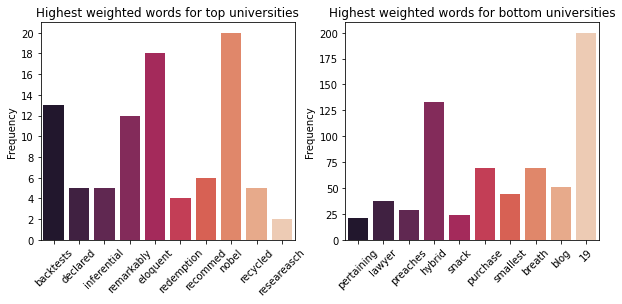

In [19]:
#### CREATING DATA FOR PLOTTING####

#For counting occurences of high- and low-performing features
dict_of_top_words_top={'backtests': 0, \
                  'declared': 0,\
                  'inferential': 0,\
                  'remarkably': 0,\
                  'eloquent': 0,\
                  'redemption': 0,\
                  'recommed': 0,\
                  'nobel': 0,\
                  'recycled': 0,\
                  'researeasch': 0}


dict_of_top_words_bottom={'pertaining': 0, \
                  'lawyer': 0,\
                  'preaches': 0,\
                  'hybrid': 0,\
                  'snack': 0,\
                  'purchase': 0,\
                  'smallest': 0,\
                  'breath': 0,\
                  'blog': 0,\
                  '19': 0}
#top uni
for i in dict_of_top_words_top.keys():
    for j in range(len(top_uni.Clean_comment)):
        if i in top_uni.Clean_comment[j]:
            dict_of_top_words_top[i]+=1
print(dict_of_top_words_top, '\n')

#bottom uni
for i in dict_of_top_words_bottom.keys():
    for j in range(len(bottom_uni.Clean_comment)):
        if i in bottom_uni.Clean_comment[j]:
            dict_of_top_words_bottom[i]+=1
print(dict_of_top_words_bottom)

top_words_top=pd.DataFrame.from_dict(dict_of_top_words_top, orient='index')
top_words_bottom=pd.DataFrame.from_dict(dict_of_top_words_bottom, orient='index')

##### ACTUAL PLOTTING ###

fig, ax =plt.subplots(1,2, sharey=False, figsize=(10,4))
#first plot
ax[0]=sns.barplot(data=top_words_top, x=list(top_words_top.index), y=top_words_top[0],palette='rocket', ax=ax[0])
ax[0].set_ylabel('Frequency')
ax[0].title.set_text('Highest weighted words for top universities')
ax[0].set(ylim=(0, 21), yticks=[2*x for x in range(11)])
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
#second plot
ax[1]=sns.barplot(data=top_words_bottom, x=list(top_words_bottom.index), y=top_words_bottom[0],palette='rocket', ax=ax[1])
#ax[1].set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax[1].set_ylabel('Frequency')
ax[1].title.set_text('Highest weighted words for bottom universities')
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
plt.savefig('topbottom10.png',bbox_inches='tight')


## Graph of weights

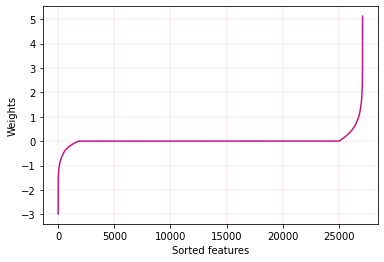

In [20]:
coefs_df=pd.read_csv('coef_final.csv').round(decimals=4)
sorted_coefs=coefs_df.T.sort_values(by=[0]).reset_index(drop=True).reset_index()
sorted_coefs=sorted_coefs.rename(columns={"index":"xval"}).rename(columns={0:"yval"})

plt.plot(sorted_coefs['xval'], sorted_coefs.yval, color='mediumvioletred')
plt.grid(color='mediumvioletred', linestyle='-', linewidth=0.1)
plt.xlabel('Sorted features')
plt.ylabel('Weights')
plt.savefig('weights.png')

## Comments per year bar plot

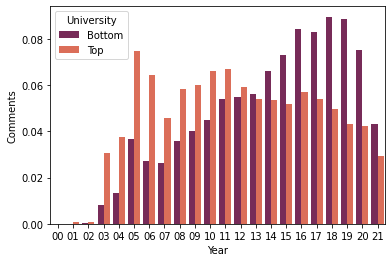

In [21]:
comment_df['year'] = comment_df['Dates'].str[2:4]

statgrouped = comment_df.groupby(["status", "year"]).count()

statgrouped =statgrouped.groupby(level=[0]).apply(lambda g: g / g.sum())
statgrouped=statgrouped.reset_index()

statgrouped.status = np.where(statgrouped['status']=='top', 'Top',statgrouped.status)
statgrouped.status = np.where(statgrouped['status']=='bottom', 'Bottom',statgrouped.status)


ax = sns.barplot(data=statgrouped, x='year', y='Comments', hue = 'status', palette = 'rocket').legend(title="University")
plt.xlabel('Year')

plt.savefig('uni_share_year.png')